In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../dataset/pima-indians-diabetes.csv', names=['pregnant', "plasma", 'pressure', 'thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by="pregnant", ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<AxesSubplot:>

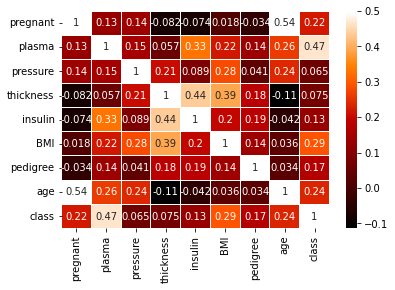

In [9]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor="white", annot=True)

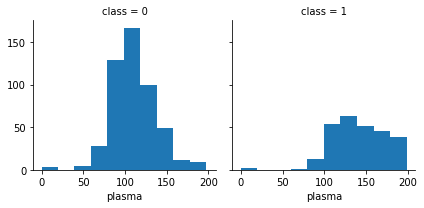

In [11]:
grid = sns.FacetGrid(df, col="class")
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

In [15]:
# 랜덤 값을 같게 하기 위해서 
np.random.seed(3)
tf.random.set_seed(3)

In [28]:
dataset = np.loadtxt("../dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:, 0:8]
Y = dataset[:, 8]
len(X[1])

8

In [17]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [18]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
77/77 [==============================] - 1s 2ms/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 2ms/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 2ms/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6758
Epoch 11

In [20]:
print("Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

24/24 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7708
Accuracy: 0.7708


In [21]:
model.save('pima.h5')

In [34]:
model = load_model('pima.h5')